# A little statistics

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm as norm
from scipy.stats import chi2 as chi2


Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

In [3]:
#Normal distribution with sigma 0.7
f = norm.cdf(0.7, loc = 0, scale = 1)
print(f)
print(norm.ppf(f))

0.758036347776927
0.7


A negative value means that the point is located on the other side of the distribution.

Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.

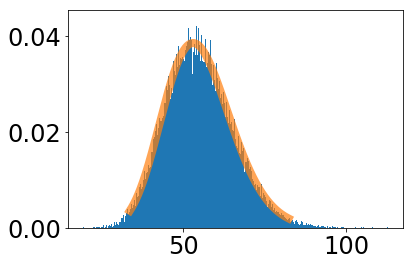

In [47]:
#Chi-Squared distribution as an analytic PDF and realization with 100k sample size

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
df = 55
x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 1000)
r = chi2.rvs(df, size=100000)
ax.hist(r,1000, density=True)
ax.plot(x, chi2.pdf(x, df), linewidth=8, alpha=0.7)
plt.show()

Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'. Select a value for your hypothetical measurement.

In [50]:
#Select a value for your hypothetical measurement
#Our hypothetical target value here is 70
f = chi2.cdf(70, df)
#Clearly state the statistical question you want to ask in words
print("What is the likelihood that the target signal was from the source rather than background noise?")
#Convert your word question into a mathematical integral

#Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. .cdf() and .ppf() in scipy).
print("Probability: ", f)
#Convert your probability into an equivalent 'sigma'
print("Sigma from given probability: ", chi2.ppf(f, df))

What is the likelihood that the target signal was from the source rather than background noise?
Probability:  0.9161904920443094
Sigma from given probability:  70.0


Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

# Non-continuous distributions